OSCILLATION OF MOTION OF PENDULUM

Damped Pendulumn
The code below is for damped motion. This means, the motion of the oscillator reduces due to an external force. 
We will use the second order differential equation.

This code defines a function damp_Pen() that takes in theta, t, damping coefficient b, acceleration due to gravity g, length of the pendulum l and mass of the bob m as inputs and returns the first derivative of theta and angular velocity.
It then defines the initial conditions for the pendulum, the time step and the time array, it uses the ODEINT function to solve the differential equation and integrate the solution over time.
Finally it plots the angular displacement as a function of time using the matplotlib library.

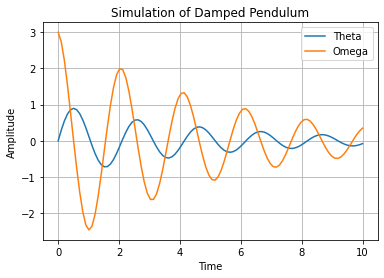

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

def damp_Pen(x0, t, b, g, l,m):
    theta=x0[0]
    omega=x0[1]
    theta_dot=omega
    omega_dot=-((b/m)*(omega))-((g/l)*math.sin(theta));
    x_dot=[theta_dot,omega_dot]
    return x_dot

#the damping coeffiecient
b=0.02  

#acceleration due gravity
g= 9.81 

#the length of the string
l= 1 

#the mass of the bob
m= 0.05 

#iniial conditions
x0=[0,3]
t=np.linspace(0,10,100)

#solving the ODE
x = odeint(damp_Pen,x0,t,args=(b,g,l,m))

# Plot the results
plt.plot(t, x[:,0],label='Theta')
plt.plot(t, x[:,1],label='Omega')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.grid(True)
plt.title('Simulation of Damped Pendulum')
plt.show()



In [2]:
import pandas as pd
results = pd.DataFrame(columns=['Time', 'Theta'])
for i in range(len(t)):
    results = results.append({'Time': t[i], 'Theta': theta[i,0]}, ignore_index=True)
results = results.set_index('Time')    
results.to_csv('pendulum_data.csv', index=['Time'])
results.plot(grid=True)

NameError: ignored

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split
# Load the data
data = pd.read_csv('pendulum_data.csv')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Time'], data['Theta'], test_size=0.2)

# Reshape the data 
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Train the model
reg = LinearRegression().fit(X_train, y_train)

# Predict on the test set
y_pred = reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mse)


FileNotFoundError: ignored

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the data
data = pd.read_csv('pendulum_data.csv')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Time'], data['Theta'], test_size=0.2)

# Create the model
model = Sequential()
model.add(Dense(32, input_dim=1, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32)

# Evaluate the model
mse = model.evaluate(X_test, y_test, batch_size=32)
print('Mean squared error: ', mse)


FileNotFoundError: ignored

This code defines the function pendulum() which takes in the variables y, t, l and g as input and returns the first derivative of theta and angular velocity.
It then defines the initial conditions for the pendulum, the time step and the time array, it uses the ODEINT function to solve the differential equation and integrate the solution over time.
It then plots the angular displacement as a function of time using the matplotlib library.
The initial angle, angular velocity and length of the pendulum can be adjusted to see the effect of these parameters on the motion of the pendulum.

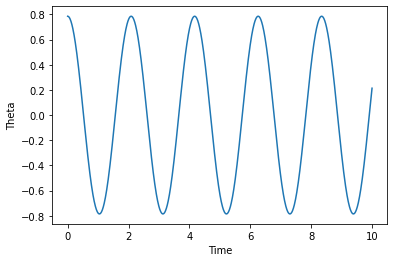

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the pendulum dynamics
def pendulum(y, t, l, g):
    theta, omega = y
    dydt = [omega, -(g/l)*np.sin(theta)]
    return dydt

# Initial conditions
theta_0 = np.pi/4 # initial angle
omega_0 = 0 # initial angular velocity
y_0 = [theta_0, omega_0]

# Simulation parameters
l = 1 # length of pendulum
g = 9.81 # acceleration due to gravity
t = np.linspace(0, 10, 1000) # time

# Solve the ODE
sol = odeint(pendulum, y_0, t, args=(l, g))

# Plot the results
plt.plot(t, sol[:, 0])
plt.xlabel('Time')
plt.ylabel('Theta')
plt.show()


In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the pendulum dynamics
def pendulum(y, t, l, g):
    theta, omega = y
    dydt = [omega, -(g/l)*np.sin(theta)]
    return dydt

# Initial conditions
theta_0 = np.pi/4 # initial angle
omega_0 = 0 # initial angular velocity
y_0 = [theta_0, omega_0]

# Simulation parameters
l = 1 # length of pendulum
g = 9.81 # acceleration due to gravity
t = np.linspace(0, 10, 1000) # time

# Solve the ODE
sol = odeint(pendulum, y_0, t, args=(l, g))

# Extract theta values
theta = sol[:, 0]

# Add a column of ones for the constant term in the linear regression
X = np.ones((len(theta), 2))
X[:, 1] = t

# Fit the linear regression model
reg = LinearRegression().fit(X, theta)

# Print the model coefficients
print(reg.intercept_, reg.coef_[1])


0.055395352705455786 -0.016018439771492136


In [7]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Define the pendulum dynamics
def pendulum(theta, t, l, g):
    omega = -(g/l)*np.sin(theta)
    return omega

# Create training data
l = 1 # length of pendulum
g = 9.81 # acceleration due to gravity
theta_values = np.linspace(0, np.pi, 100) # angles
t_values = np.linspace(0, 10, 100) # time
omega_values = pendulum(theta_values, t_values, l, g) # angular velocity

# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(theta_values.reshape(-1, 1))
y_train = omega_values

# Build the neural network
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=200)

# Predict angular velocity for a given angle
theta_test = np.array([[np.pi/4]])
theta_test = scaler.transform(theta_test)
omega_pred = model.predict(theta_test)
print("Predicted angular velocity:", omega_pred)


Epoch 1/200
4/4 [==============================] - 1s 6ms/step - loss: 41.1816
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 41.1140
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 41.0494
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 40.9821
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 40.9183
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 40.8509
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 40.7841
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 40.7190
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 40.6523
Epoch 10/200
4/4 [==============================] - 0s 6ms/step - loss: 40.5898
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 40.5246
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 40.4614
Epoch 13/200
4/4 [==============================]

In [8]:
import torch
import torch.nn as nn
from time import perf_counter
from PIL import Image
import matplotlib.pyplot as plt
from functools import partial
import numpy as np
import requests
import os

## check if GPU is available and use it; otherwise use CPU
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

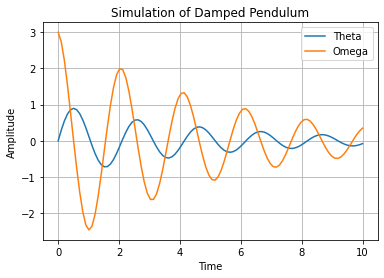

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

def damp_Pen(x0, t, b, g, l,m):
    theta=x0[0]
    omega=x0[1]
    theta_dot=omega
    omega_dot=-((b/m)*(omega))-((g/l)*math.sin(theta));
    x_dot=[theta_dot,omega_dot]
    return x_dot

#the damping coeffiecient
b=0.02  

#acceleration due gravity
g= 9.81 

#the length of the string
l= 1 

#the mass of the bob
m= 0.05 

#iniial conditions
x0=[0,3]
t=np.linspace(0,10,100)

#solving the ODE
x = odeint(damp_Pen,x0,t,args=(b,g,l,m))

# Plot the results
plt.plot(t, x[:,0],label='Theta')
plt.plot(t, x[:,1],label='Omega')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.grid(True)
plt.title('Simulation of Damped Pendulum')
plt.show()


In [10]:
def u(theta, omega):
    u = neural_net(tf.concat([theta,omega],1), weights, biases)
    return u

In [11]:
def f(theta, omega):
    u = u(theta, omega)
    u_t = tf.gradients(u, t)[0]
    u_x = tf.gradients(u, x)[0]
    u_xx = tf.gradients(u_x, x)[0]
    f = u_t + u*u_x - (0.01/tf.pi)*u_xx
    return f
    print(f)